In [1]:
from types import SimpleNamespace

import awkward as ak
import matplotlib.pyplot as plt
import numpy as np
from rich import print
from tabulate import tabulate

from apps.prod4a_merge_study import EventSelection, PFOSelection, SignalBackground, SplitSample, ShowerMergeQuantities
from python.analysis import Master, Plots

events = Master.Data("work/ROOTFiles/Prod4a_6GeV_BeamSim_00.root", True)

EventSelection(events)
PFOSelection(events)
start_showers, to_merge = SplitSample(events)

# mask = events.recoParticles.cnn_score != -999
# events.Filter([mask])
# start_showers = [start_showers[i][mask] for i in range(2)]

# mask = np.logical_or(events.recoParticles.shower_start_pos.x != -999, events.recoParticles.shower_momentum.x != -999)
# events.Filter([mask])
# start_showers = [start_showers[i][mask] for i in range(2)]

#start_showers = [start_showers[i][mask] for i in range(2)]

#* get boolean mask of PFP's to merge
to_merge = np.logical_not(np.logical_or(*start_showers))

#* class to calculate quantities
q = ShowerMergeQuantities(events, to_merge)

signal, background, signal_all = SignalBackground(events, start_showers, to_merge)

/home/sb16165/Documents/pi0-analysis/analysis/python/analysis/Master.py:52: UserWarning: Couldn't apply filters to filters.
  warnings.warn(f"Couldn't apply filters to {var}.")
/home/sb16165/Documents/pi0-analysis/analysis/python/analysis/Master.py:52: UserWarning: Couldn't apply filters to filename.
  warnings.warn(f"Couldn't apply filters to {var}.")
/home/sb16165/Documents/pi0-analysis/analysis/python/analysis/Master.py:52: UserWarning: Couldn't apply filters to _TrueParticleData__pi0_MC.
  warnings.warn(f"Couldn't apply filters to {var}.")


'BeamMCFilter' executed in 11.0147s
number of dalitz decays: 222
'ApplyBeamFilter' executed in 8.3717s


\begin{tabular}{lllll}
\hline
 event selection                   & type        & number of events & percentage of events removed & percentage of 
events remaining \\
 no selection                      & -           & 100222           & -                            &               
\\
 beam -\ensuremath{>} pi0 + X                   & truth       & 27341            & 72.71956257109217            & 
100                            \\
 pi+ beam                          & backtracked & 19949            & 27.036319081233312           & 
72.96368091876668              \\
 diphoton decay                    & truth       & 19727            & 1.1128377362273798           & 
72.15171354376211              \\
 beam particle                     & reco        & 10017            & 49.22187864348355            & 
36.637284664057646             \\
 nPFP \ensuremath{>} 1                          & reco        & 10017            & 0.0                          & 
36.637284664057646             \\
 at least 1 true particle          & backtracked & 10017            & 0.0                          & 
36.637284664057646             \\
 both true photons are backtracked & backtracked & 4356             & 56.51392632524708            & 
15.932116601441052             \\
\hline
\end{tabular}

'EventSelection' executed in 137.3416s


Total number of PFOs: 2645612

/home/sb16165/Documents/pi0-analysis/analysis/python/analysis/Master.py:52: UserWarning: Couldn't apply filters to _RecoParticleData__beam_number.
  warnings.warn(f"Couldn't apply filters to {var}.")
/home/sb16165/Documents/pi0-analysis/analysis/python/analysis/Master.py:52: UserWarning: Couldn't apply filters to _RecoParticleData__beamVertex.
  warnings.warn(f"Couldn't apply filters to {var}.")
/home/sb16165/Documents/pi0-analysis/analysis/python/analysis/Master.py:52: UserWarning: Couldn't apply filters to run.
  warnings.warn(f"Couldn't apply filters to {var}.")
/home/sb16165/Documents/pi0-analysis/analysis/python/analysis/Master.py:52: UserWarning: Couldn't apply filters to subRun.
  warnings.warn(f"Couldn't apply filters to {var}.")
/home/sb16165/Documents/pi0-analysis/analysis/python/analysis/Master.py:52: UserWarning: Couldn't apply filters to eventNum.
  warnings.warn(f"Couldn't apply filters to {var}.")


Total number of PFOs after cut: 2621555

Total number of PFOs: 2621555

Total number of PFOs after cut: 1345045

'PFOSelection' executed in 23.7660s


False

[394, 303, 245, 222, 226, 298, 198, 363, ... 303, 418, 244, 257, 262, 362, 382, 431]

[394, 303, 245, 222, 226, 298, 198, 363, ... 303, 418, 244, 257, 262, 362, 382, 431]

False

False

True

True

True

'SplitSample' executed in 35.4474s


4356

1336333

2672666

1336333

initial signal: 13810

initial background: 1322523

╒════════╤══════════╤══════════════╤═════════════════════╤═════════════════════════╤═════════╤══════════╕
│    cut │   signal │   background │   signal efficiency │   background efficiency │   delta │   purity │
╞════════╪══════════╪══════════════╪═════════════════════╪═════════════════════════╪═════════╪══════════╡
│ 0.0000 │    13810 │      1322523 │              1.0000 │                  1.0000 │  0.0000 │   0.0103 │
├────────┼──────────┼──────────────┼─────────────────────┼─────────────────────────┼─────────┼──────────┤
│ 0.0100 │    13782 │      1319511 │              0.9980 │                  0.9977 │  0.0002 │   0.0103 │
├────────┼──────────┼──────────────┼─────────────────────┼─────────────────────────┼─────────┼──────────┤
│ 0.0200 │    13757 │      1316821 │              0.9962 │                  0.9957 │  0.0005 │   0.0103 │
├────────┼──────────┼──────────────┼─────────────────────┼─────────────────────────┼─────────┼──────────┤
│ 0.0300 │    13730 │      1314112 │              0.9942 │                  0.9936 │  0.0006 │   0.0103 │
├────────┼──────────┼──────────────┼─────────────────────┼─────────────────────────┼─────────┼──────────┤
│ 0.0400 │    13711 │      1310916 │              0.9928 │                  0.9912 │  0.0016 │   0.0104 │
├────────┼──────────┼──────────────┼─────────────────────┼─────────────────────────┼─────────┼──────────┤
│ 0.0500 │    13686 │      1307247 │              0.9910 │                  0.9884 │  0.0026 │   0.0104 │
├────────┼──────────┼──────────────┼─────────────────────┼─────────────────────────┼─────────┼──────────┤
│ 0.0600 │    13662 │      1302743 │              0.9893 │                  0.9850 │  0.0042 │   0.0104 │
├────────┼──────────┼──────────────┼─────────────────────┼─────────────────────────┼─────────┼──────────┤
│ 0.0700 │    13638 │      1297297 │              0.9875 │                  0.9809 │  0.0066 │   0.0104 │
├────────┼──────────┼──────────────┼─────────────────────┼─────────────────────────┼─────────┼──────────┤
│ 0.0800 │    13615 │      1290878 │              0.9859 │                  0.9761 │  0.0098 │   0.0104 │
├────────┼──────────┼──────────────┼─────────────────────┼─────────────────────────┼─────────┼──────────┤
│ 0.0900 │    13584 │      1283360 │              0.9836 │                  0.9704 │  0.0132 │   0.0105 │
├────────┼──────────┼──────────────┼─────────────────────┼─────────────────────────┼─────────┼──────────┤
│ 0.1000 │    13556 │      1274616 │              0.9816 │                  0.9638 │  0.0178 │   0.0105 │
├────────┼──────────┼──────────────┼─────────────────────┼─────────────────────────┼─────────┼──────────┤
│ 0.1100 │    13532 │      1264723 │              0.9799 │                  0.9563 │  0.0236 │   0.0106 │
├────────┼──────────┼──────────────┼─────────────────────┼─────────────────────────┼─────────┼──────────┤
│ 0.1200 │    13504 │      1254223 │              0.9778 │                  0.9484 │  0.0295 │   0.0107 │
├────────┼──────────┼──────────────┼─────────────────────┼─────────────────────────┼─────────┼──────────┤
│ 0.1300 │    13476 │      1243419 │              0.9758 │                  0.9402 │  0.0356 │   0.0107 │
├────────┼──────────┼──────────────┼─────────────────────┼─────────────────────────┼─────────┼──────────┤
│ 0.1400 │    13455 │      1232291 │              0.9743 │                  0.9318 │  0.0425 │   0.0108 │
├────────┼──────────┼──────────────┼─────────────────────┼─────────────────────────┼─────────┼──────────┤
│ 0.1500 │    13427 │      1221145 │              0.9723 │                  0.9233 │  0.0489 │   0.0109 │
├────────┼──────────┼──────────────┼─────────────────────┼─────────────────────────┼─────────┼──────────┤
│ 0.1600 │    13395 │      1210483 │              0.9699 │                  0.9153 │  0.0547 │   0.0109 │
├────────┼──────────┼──────────────┼─────────────────────┼─────────────────────────┼─────────┼──────────┤
│ 0.1700 │    13366 │      1200154 │              0.9678 │                  0.

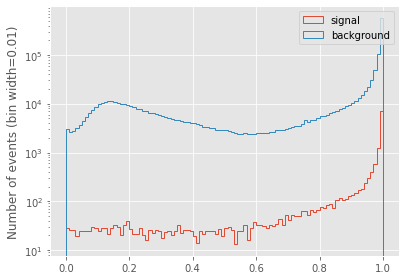

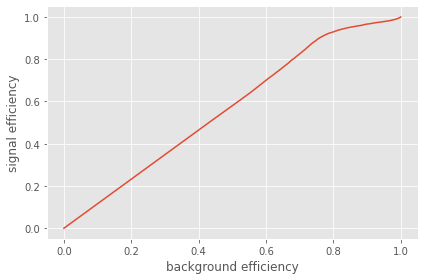

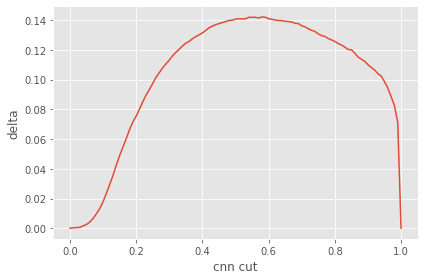

In [2]:
plt.style.use('ggplot')
plt.rcParams.update({'patch.linewidth': 1})
print(ak.count(events.eventNum))

print(ak.count(events.recoParticles.number))
print(ak.count(signal))
print(ak.count(signal_all))

cnn = events.recoParticles.cnn_score
# print(ak.count(cnn))

Plots.PlotHistComparison([
    ak.ravel(cnn[signal_all]), 
    ak.ravel(cnn[background])],
    y_scale="log", labels=["signal", "background"], density=False)

ts = ak.count(signal_all[signal_all])
tb = ak.count(background[background])
cut = np.linspace(0, 1, 101)

print(f"initial signal: {ts}")
print(f"initial background: {tb}")

out = {"cut": cut, "signal" : [], "background" : [], "signal efficiency": [], "background efficiency": [], "delta": [], "purity": []}

def count(mask):
    return ak.count(mask[mask])

for c in cut:
    mask = cnn > c
    s = count(mask[signal_all])
    b = count(mask[background])
    out["signal"].append(s)
    out["background"].append(b)
    out["signal efficiency"].append(s/ts)
    out["background efficiency"].append(b/tb)
    out["delta"].append(s/ts - b/tb)
    out["purity"].append(s/(s+b) if s+b > 0 else -1)
    #print(f"cut: {c:.2f} | signal: {ak.count(s[s])/ts:.2f} | background: {ak.count(b[b])/tb:.2f}")

Plots.Plot(out["background efficiency"], out["signal efficiency"], "background efficiency", "signal efficiency")
print(tabulate(out, headers=out.keys(), tablefmt="fancy_grid", floatfmt=".4f"))
Plots.Plot(out["cut"], out["delta"], xlabel="cnn cut", ylabel="delta")